<a href="https://colab.research.google.com/github/duytan118/AI/blob/BTVN/face.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

from os import listdir
from numpy import asarray, save
from keras.utils import load_img
from keras.utils import img_to_array
import numpy as np
from sklearn.model_selection import train_test_split
from keras.datasets import cifar100
import matplotlib.pyplot as plt
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, Normalization
from keras.models import Sequential, Model
from keras import Input
from keras.layers import LeakyReLU
from keras.optimizers import Adam

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
from numpy import asarray

folder = '/content/drive/MyDrive/Colab Notebooks/BTVN/face_data/'
photos, labels = list(), list()
for file in listdir(folder):
  output = 0.0
  if file.startswith('ntn'):
    output = 0
  if file.startswith('pqhuy'):
    output = 1
  if file.startswith('QTrung'):
    output = 2
  if file.startswith('sang'):
    output = 3
  if file.startswith('Thao'):
    output = 4
  if file.startswith('Thinh'):
    output = 5
  
  photo = load_img(folder + file, target_size=(50, 50))
  photo = img_to_array(photo)
  photos.append(photo)
  labels.append(output)

photos = asarray(photos)
labels = asarray(labels)
print(photos.shape, labels.shape)
save('/content/drive/MyDrive/Colab Notebooks/BTVN/Face_photos.npy', photos)
save('/content/drive/MyDrive/Colab Notebooks/BTVN/Face_labels.npy', labels)

(317, 50, 50, 3) (317,)


In [6]:
# Load images and labels
from keras.utils import to_categorical #one hot encoding
photos = np.load('/content/drive/MyDrive/Colab Notebooks/BTVN/Face_photos.npy')
labels = np.load('/content/drive/MyDrive/Colab Notebooks/BTVN/Face_labels.npy')
labels_one_hot = to_categorical(labels)
x_train, x_test, y_train, y_test = train_test_split(photos, labels_one_hot, test_size = 0.3, random_state = 100)

In [10]:
model = Sequential()
#Convolutional
model.add(Conv2D(32, kernel_size= (3,3), activation= 'relu', input_shape = (50,50,3), padding= 'same'))
model.add(MaxPooling2D((2,2), padding= 'same'))

model.add(Conv2D(64, kernel_size= (3,3), activation= 'relu', padding= 'same'))
model.add(MaxPooling2D((2,2), padding= 'same'))

model.add(Conv2D(64, kernel_size= (3,3), activation= 'relu', padding= 'same'))
model.add(Conv2D(64, kernel_size= (3,3), activation= 'relu', padding= 'same'))
model.add(MaxPooling2D((2,2), padding= 'same'))

model.add(Conv2D(128, kernel_size= (3,3), activation= 'relu', padding= 'same'))
model.add(Conv2D(128, kernel_size= (3,3), activation= 'relu', padding= 'same'))
model.add(MaxPooling2D((2,2), padding= 'same'))

# Fully connected layers
model.add(Flatten())
model.add(Dense(1024, activation= 'relu'))
model.add(Dropout(0.5))
model.add(Dense(1024, activation= 'relu'))
model.add(Dropout(0.5))
model.add(Dense(6, activation= 'softmax'))
model.compile(loss='categorical_crossentropy', optimizer = Adam(), metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 50, 50, 32)        896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 25, 25, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 25, 25, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 13, 13, 64)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 13, 13, 64)        36928     
                                                                 
 conv2d_9 (Conv2D)           (None, 13, 13, 64)       

In [11]:
#Tang cuong data
from keras.preprocessing.image import ImageDataGenerator
aug = ImageDataGenerator(rotation_range=20, zoom_range=0.1,
    rescale=1./255,
	width_shift_range=0.1,
    height_shift_range=0.1,
	horizontal_flip=True,
    brightness_range=[0.2,1.5], fill_mode="nearest")

In [12]:
train = model.fit_generator(aug.flow(x_train, y_train, batch_size=64),
                               epochs=100)

Epoch 1/100


<ipython-input-12-06eb12d74c93>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  train = model.fit_generator(aug.flow(x_train, y_train, batch_size=64),


4/4 [==============================] - 3s 128ms/step - loss: 1.8555 - accuracy: 0.1946
Epoch 2/100
4/4 [==============================] - 0s 64ms/step - loss: 1.7788 - accuracy: 0.2081
Epoch 3/100
4/4 [==============================] - 0s 81ms/step - loss: 1.7742 - accuracy: 0.1946
Epoch 4/100
4/4 [==============================] - 0s 63ms/step - loss: 1.7483 - accuracy: 0.1900
Epoch 5/100
4/4 [==============================] - 0s 68ms/step - loss: 1.7288 - accuracy: 0.2081
Epoch 6/100
4/4 [==============================] - 0s 60ms/step - loss: 1.6682 - accuracy: 0.3032
Epoch 7/100
4/4 [==============================] - 0s 61ms/step - loss: 1.5947 - accuracy: 0.3710
Epoch 8/100
4/4 [==============================] - 0s 63ms/step - loss: 1.3731 - accuracy: 0.4525
Epoch 9/100
4/4 [==============================] - 0s 81ms/step - loss: 1.2794 - accuracy: 0.4842
Epoch 10/100
4/4 [==============================] - 0s 80ms/step - loss: 1.0716 - accuracy: 0.5928
Epoch 11/100
4/4 [============

In [13]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Accuracy:", test_acc)
print('Loss:', test_loss)
model.save('/content/drive/MyDrive/Colab Notebooks/BTVN/face.h5')

3/3 [==============================] - 1s 7ms/step - loss: 37.2336 - accuracy: 0.9375
Accuracy: 0.9375
Loss: 37.23357009887695


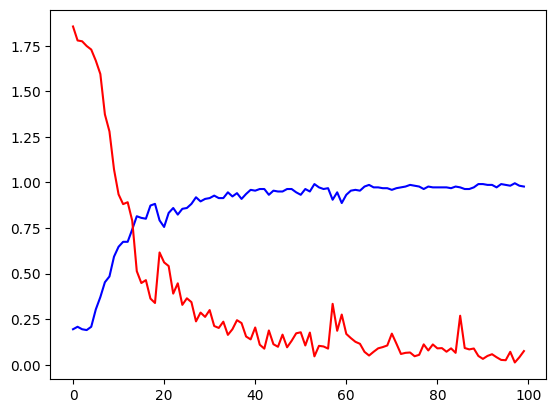

In [14]:
from matplotlib import pyplot as plt
accuracy= train.history['accuracy']
loss= train.history['loss']
epochs= range(len(accuracy))
plt.plot(epochs, accuracy, 'b', label= 'Training accuracy')
plt.plot(epochs, loss, 'r', label= 'Training loss')
plt.show()


In [15]:
from keras.models import load_model
model = load_model('/content/drive/MyDrive/Colab Notebooks/BTVN/face.h5')

1/1 [==============================] - 0s 260ms/step
Nguyễn Trọng Nghĩa


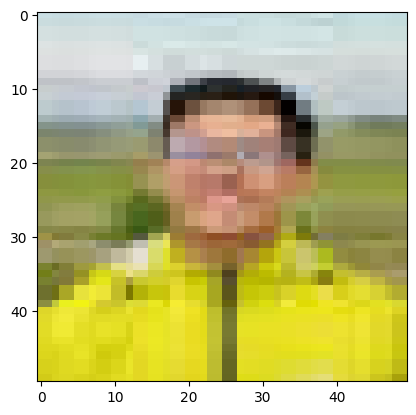

1/1 [==============================] - 0s 18ms/step
Phạm Quang Huy


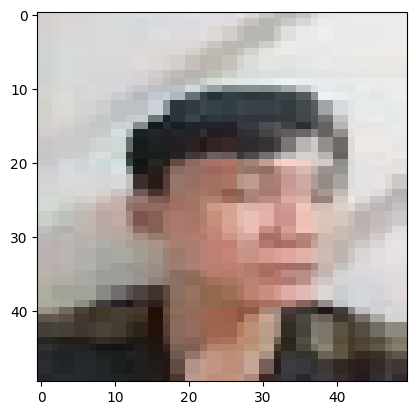

1/1 [==============================] - 0s 20ms/step
Vi Quốc Trung


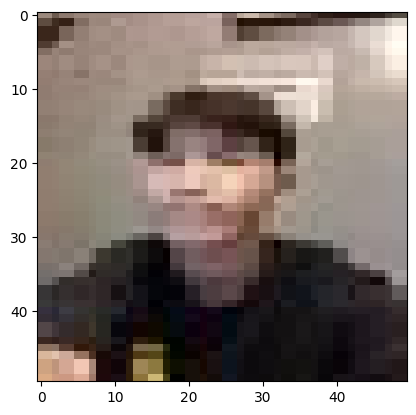

1/1 [==============================] - 0s 19ms/step
Ngô Nhựt Sang


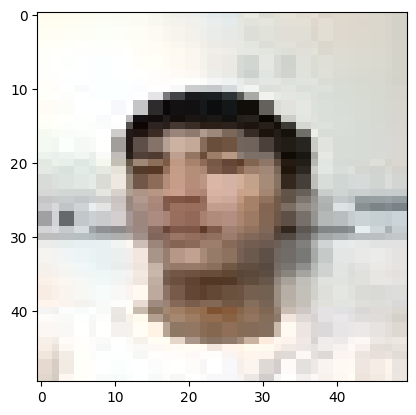

1/1 [==============================] - 0s 28ms/step
Phạm Huỳnh Nhật Thảo


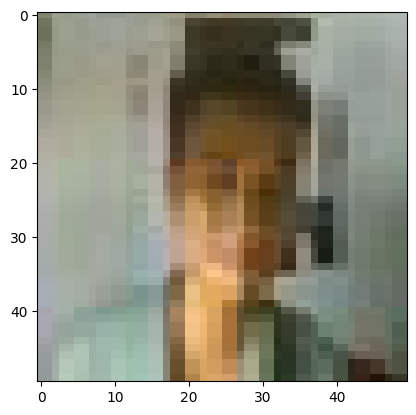

1/1 [==============================] - 0s 32ms/step
Võ Tấn Thịnh


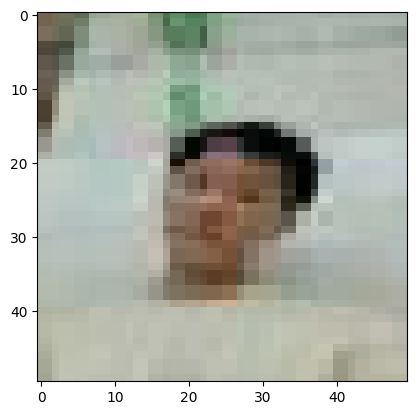

In [18]:
import os
test="/content/drive/MyDrive/Colab Notebooks/BTVN/face_data/Test"

for i in os.listdir(test):
  img=load_img(test+'/'+i,target_size=(50,50))
  plt.imshow(img)
  img=img_to_array(img)
  img=img.astype('float32')
  img=img/255
  img=np.expand_dims(img,axis=0)
  result=(model.predict(img).argmax())
  class_name=['Nguyễn Trọng Nghĩa','Phạm Quang Huy','Vi Quốc Trung','Ngô Nhựt Sang','Phạm Huỳnh Nhật Thảo','Võ Tấn Thịnh']
  print(class_name[result])
  plt.show()